In [1]:
import numpy as np
import matplotlib as plt
from scipy import signal
import os
import scipy

import sys
sys.path.append('../utils')
sys.path.append('../dFC')
import widefield_utils
import connectivity_measures

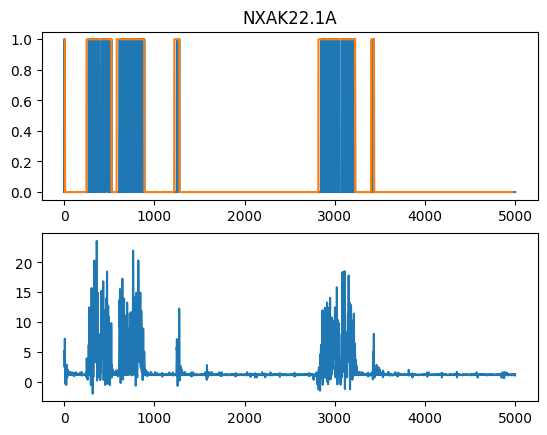

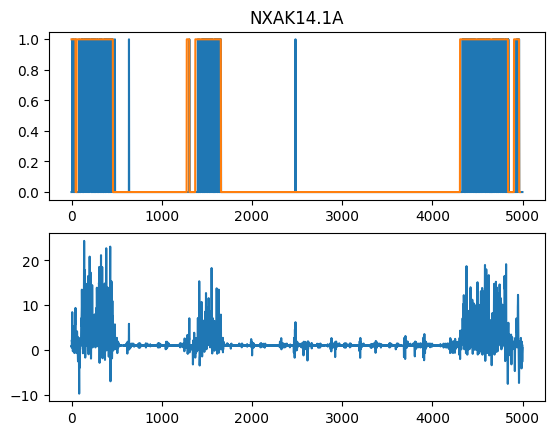

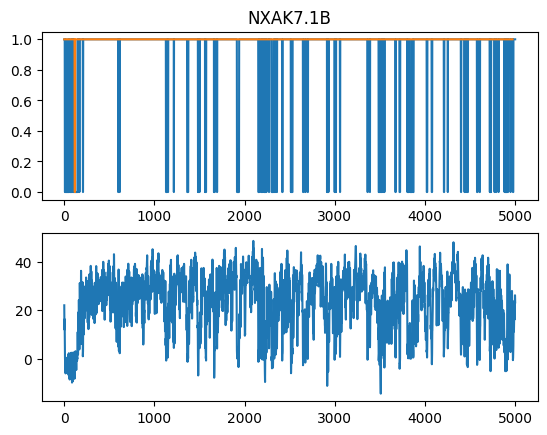

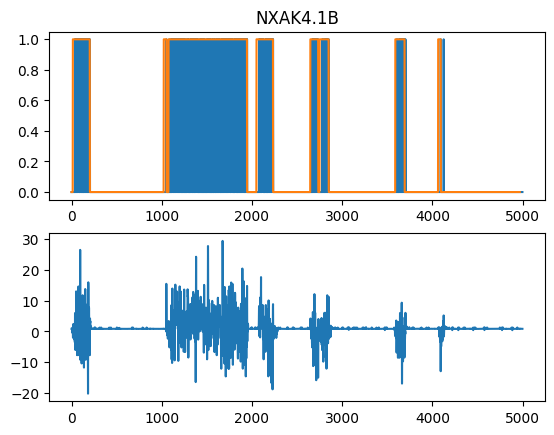

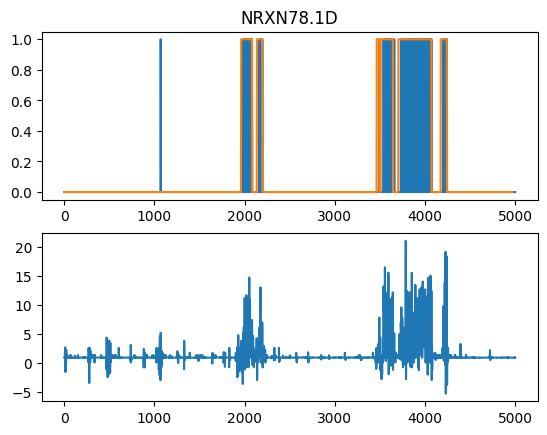

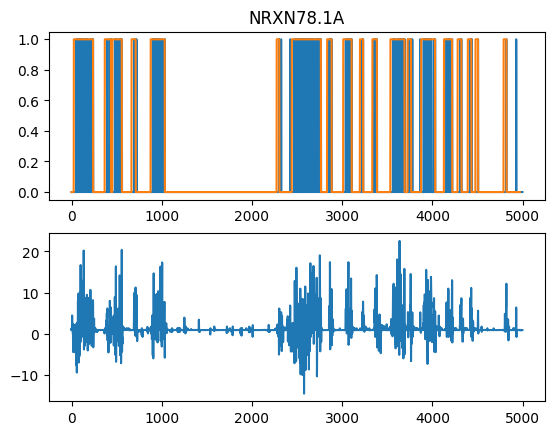

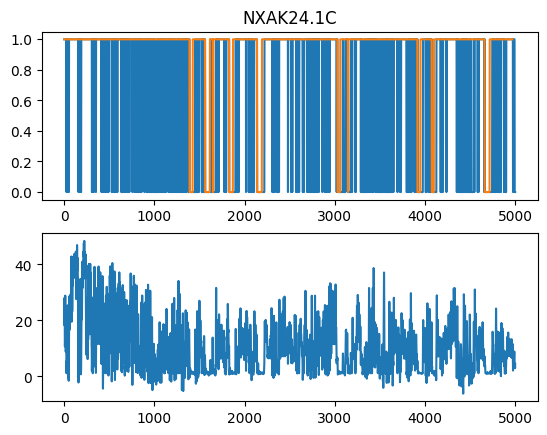

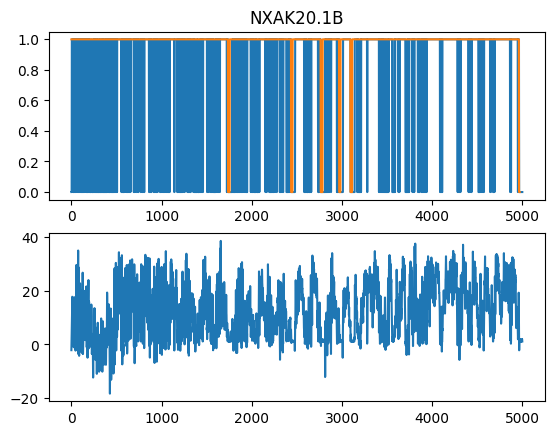

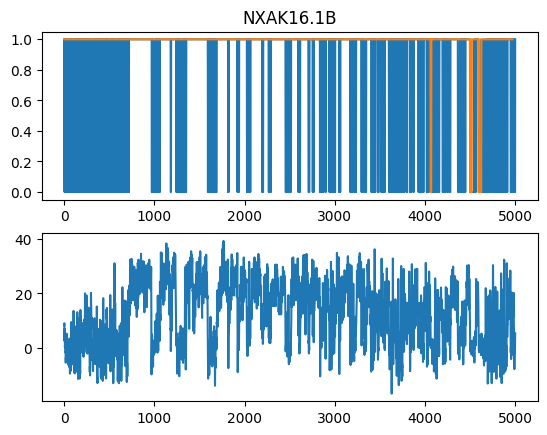

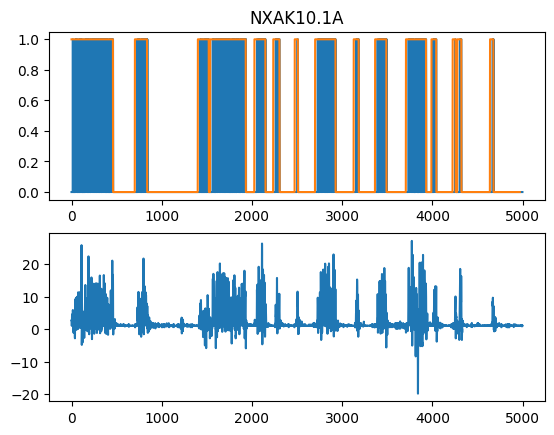

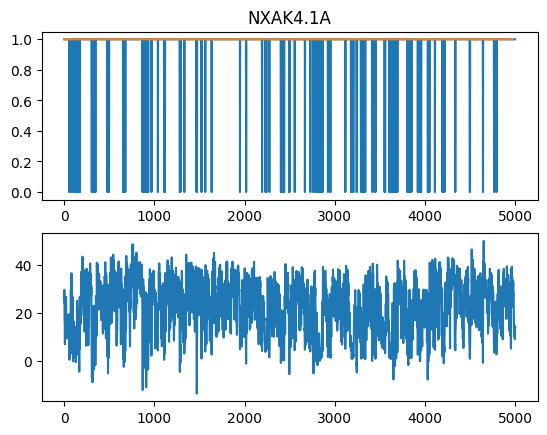

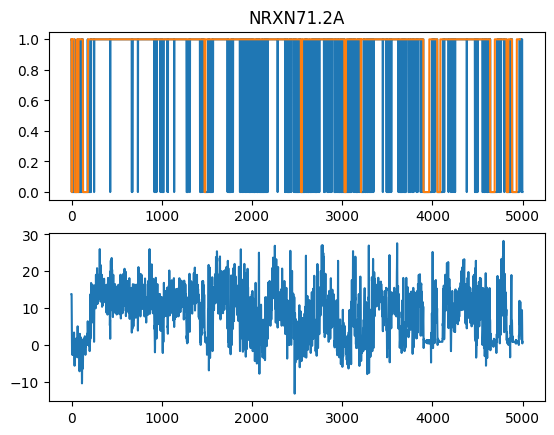

In [10]:
kernel_std = 8
threshold_upper = 5
threshold_lower = 1
start = 0
end = 5000
threshold_filtering = 0.05



names = ["NXAK22.1A","NXAK14.1A","NXAK7.1B","NXAK4.1B","NRXN78.1D","NRXN78.1A"]
names_knock = ["NXAK24.1C","NXAK20.1B","NXAK16.1B","NXAK10.1A","NXAK4.1A","NRXN71.2A"]

for name in names+names_knock:

    base_directory = r"/home/k21208334/calcium_analyses/data/" + name + "/"
    ai_matrix = np.load(os.path.join(base_directory, "Downsampled_AI_Matrix_Framewise.npy"))
    speed = ai_matrix[8,start:end]
    '''
    abs_speed = np.abs(ai_matrix[8,:]-np.mean(ai_matrix[8,start:end]))
    filtered_speed = scipy.ndimage.gaussian_filter(abs_speed,sigma = kernel_std)
    filtered_speed = (filtered_speed-np.mean(filtered_speed))/np.std(filtered_speed)
    walking = filtered_speed > threshold
    fig,ax = plt.pyplot.subplots(2,1)
    ax[0].plot(5*walking)
    ax[0].plot(filtered_speed)
    ax[1].plot(speed)
    ax[0].set_title(name)
    '''
    speed = (speed - 0.4)/.016
    walking = abs(speed) > threshold_upper
    resting = abs(speed) < threshold_lower
    
    # do running mean to find continutiy
    
    window_size = 30

    # Create a boxcar filter of size window_size
    boxcar_filter = signal.boxcar(window_size)

    # Normalize the filter so that its coefficients sum to 1
    boxcar_filter /= boxcar_filter.sum()

    # Apply the filter to the data using convolution
    filtered_walking = signal.convolve(walking, boxcar_filter, mode='valid')
    generous_walking = filtered_walking>threshold_filtering
    
    fig,ax = plt.pyplot.subplots(2,1)
    ax[0].plot(walking)
    ax[0].plot(generous_walking)
    ax[1].plot(speed)
    ax[0].set_title(name)
    
    tosave = '/home/k21208334/calcium_analyses/data/walking/' + name
    np.save(tosave,generous_walking)